Importing Necessary Modules

In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

Loading Dataset

In [7]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="xVc35INungpqqK9dZH2I")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(4).download("yolov8")

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to football-players-detection-4 in yolov8:: 100%|██████████| 522/522 [00:00<00:00, 1455.80it/s]


Custom Training for Detection

In [10]:
model = YOLO('yolov8s.pt')

results = model.train(data='/content/datasets/football-players-detection-4/data.yaml', epochs=25, imgsz=640)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/football-players-detection-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, d

/content


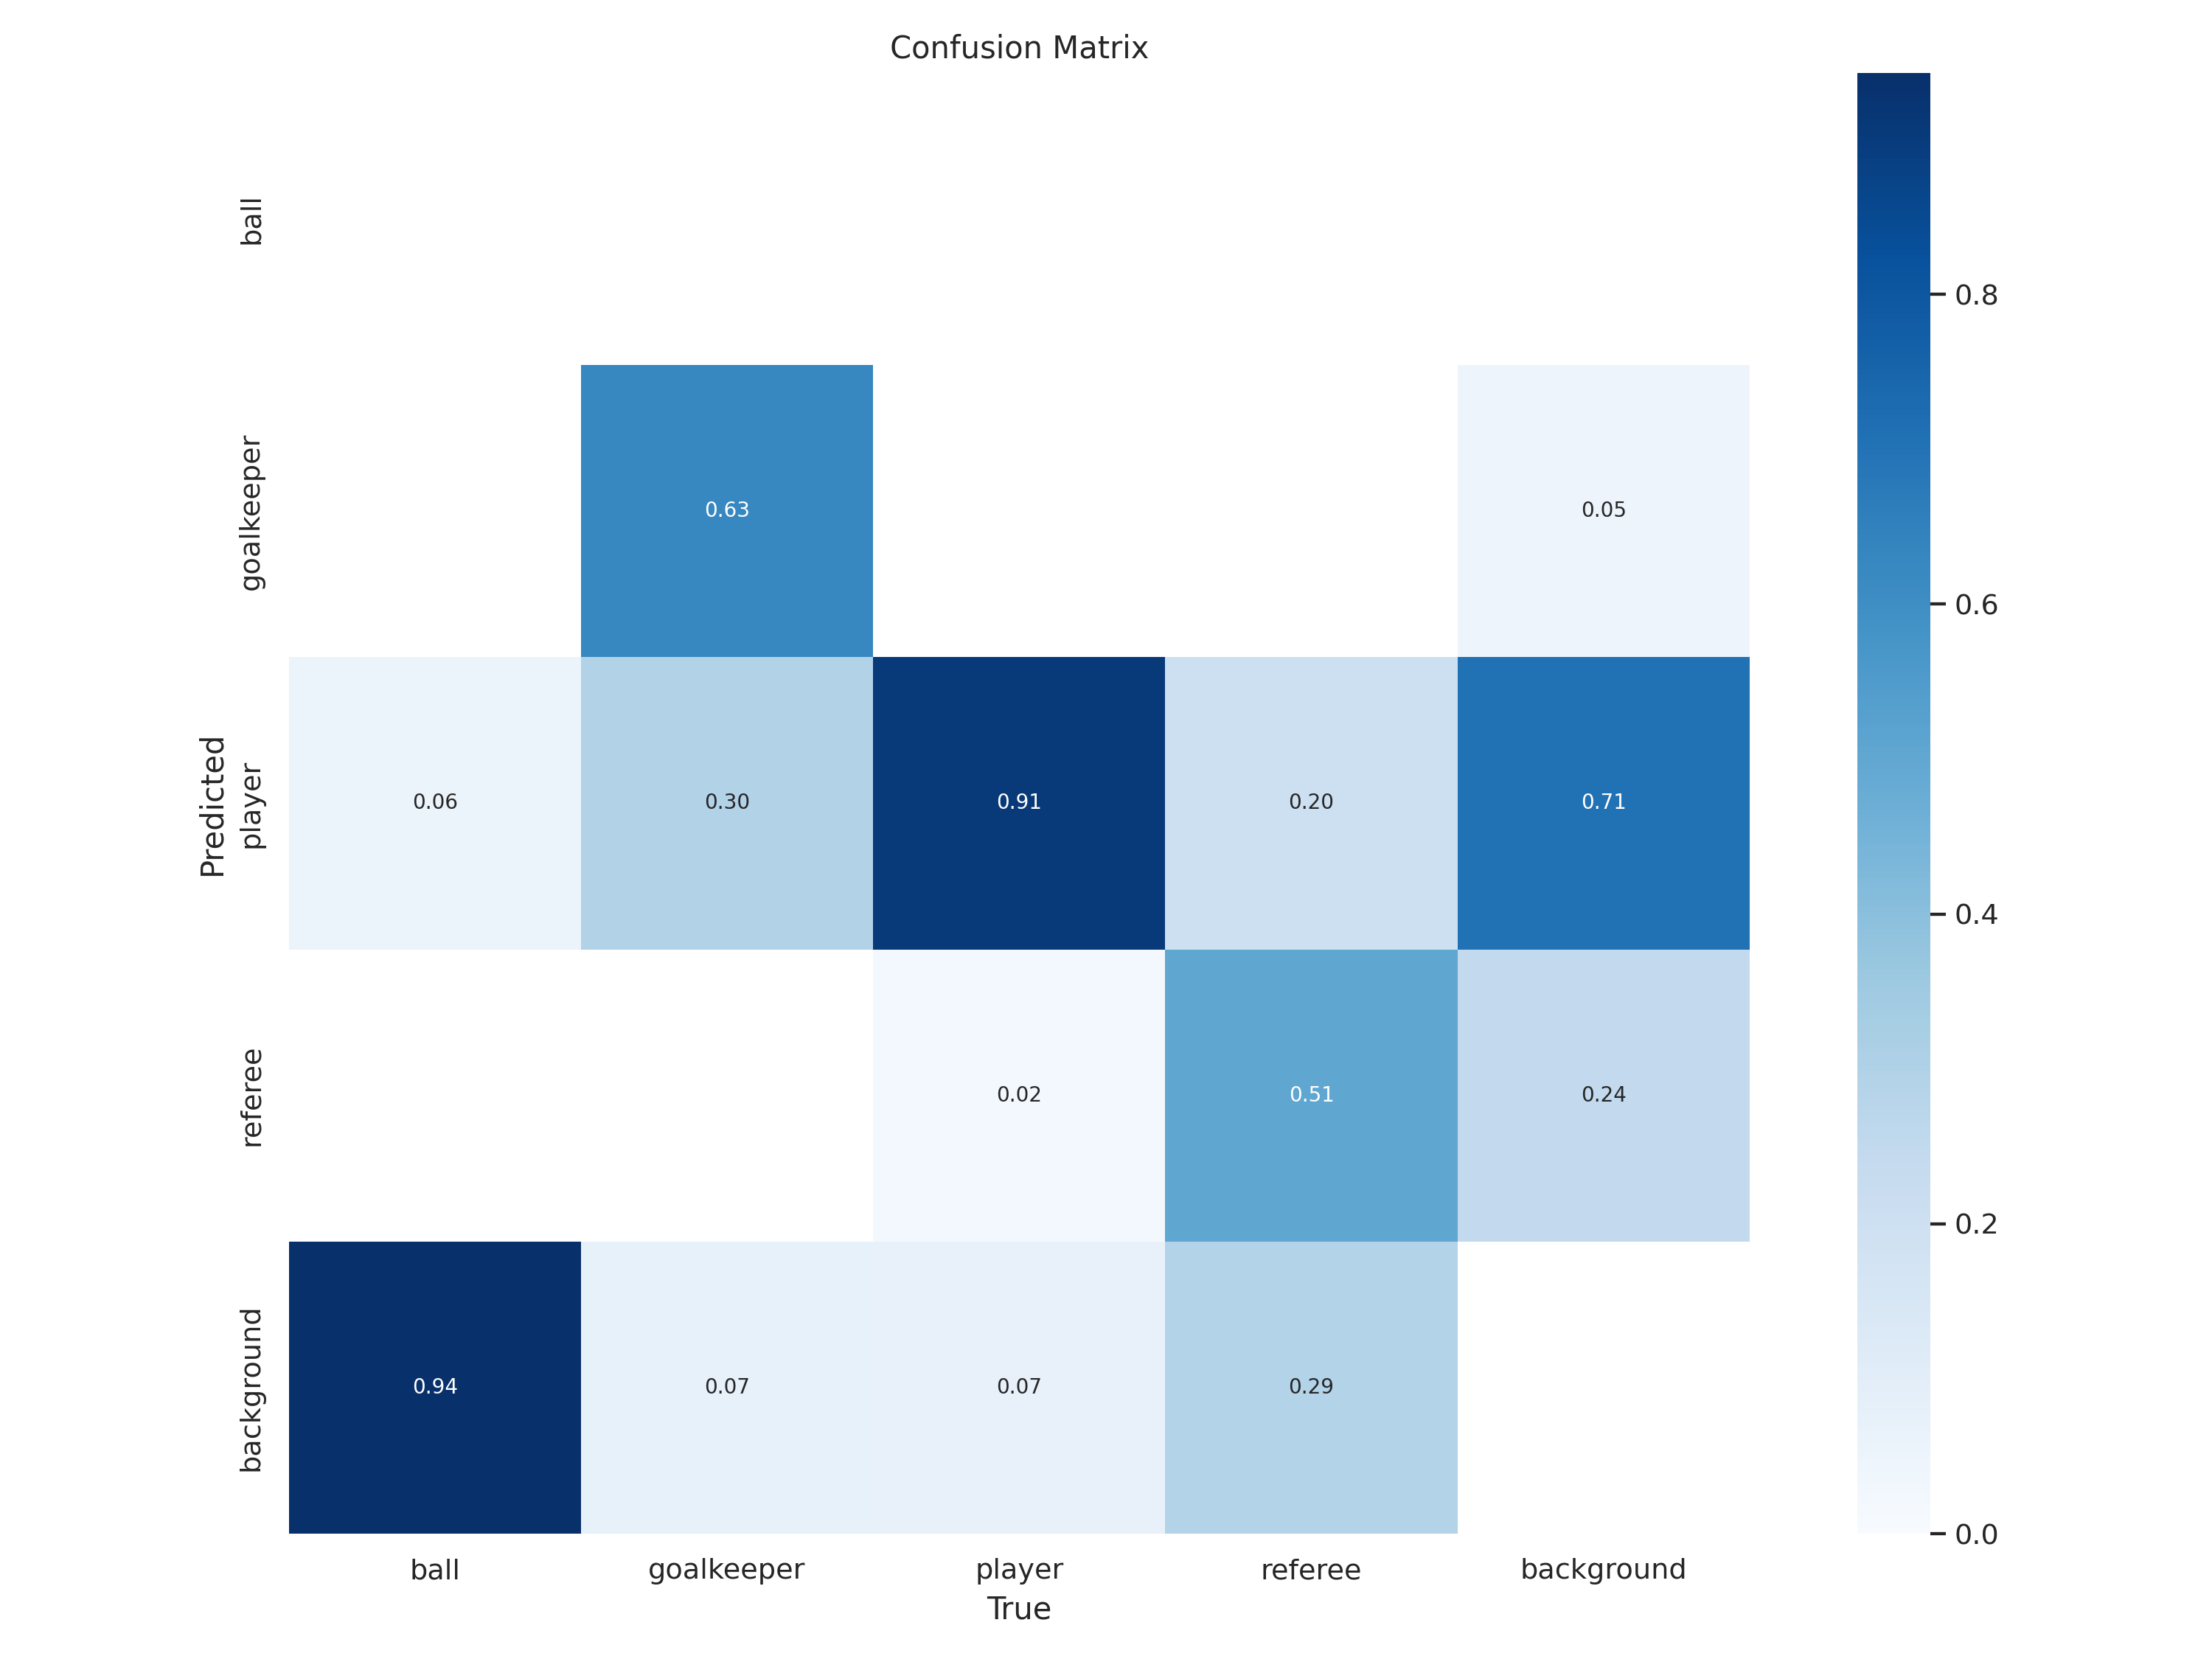

In [13]:
Image(filename=f'/content/datasets/runs/detect/train3/confusion_matrix.png', width=600)

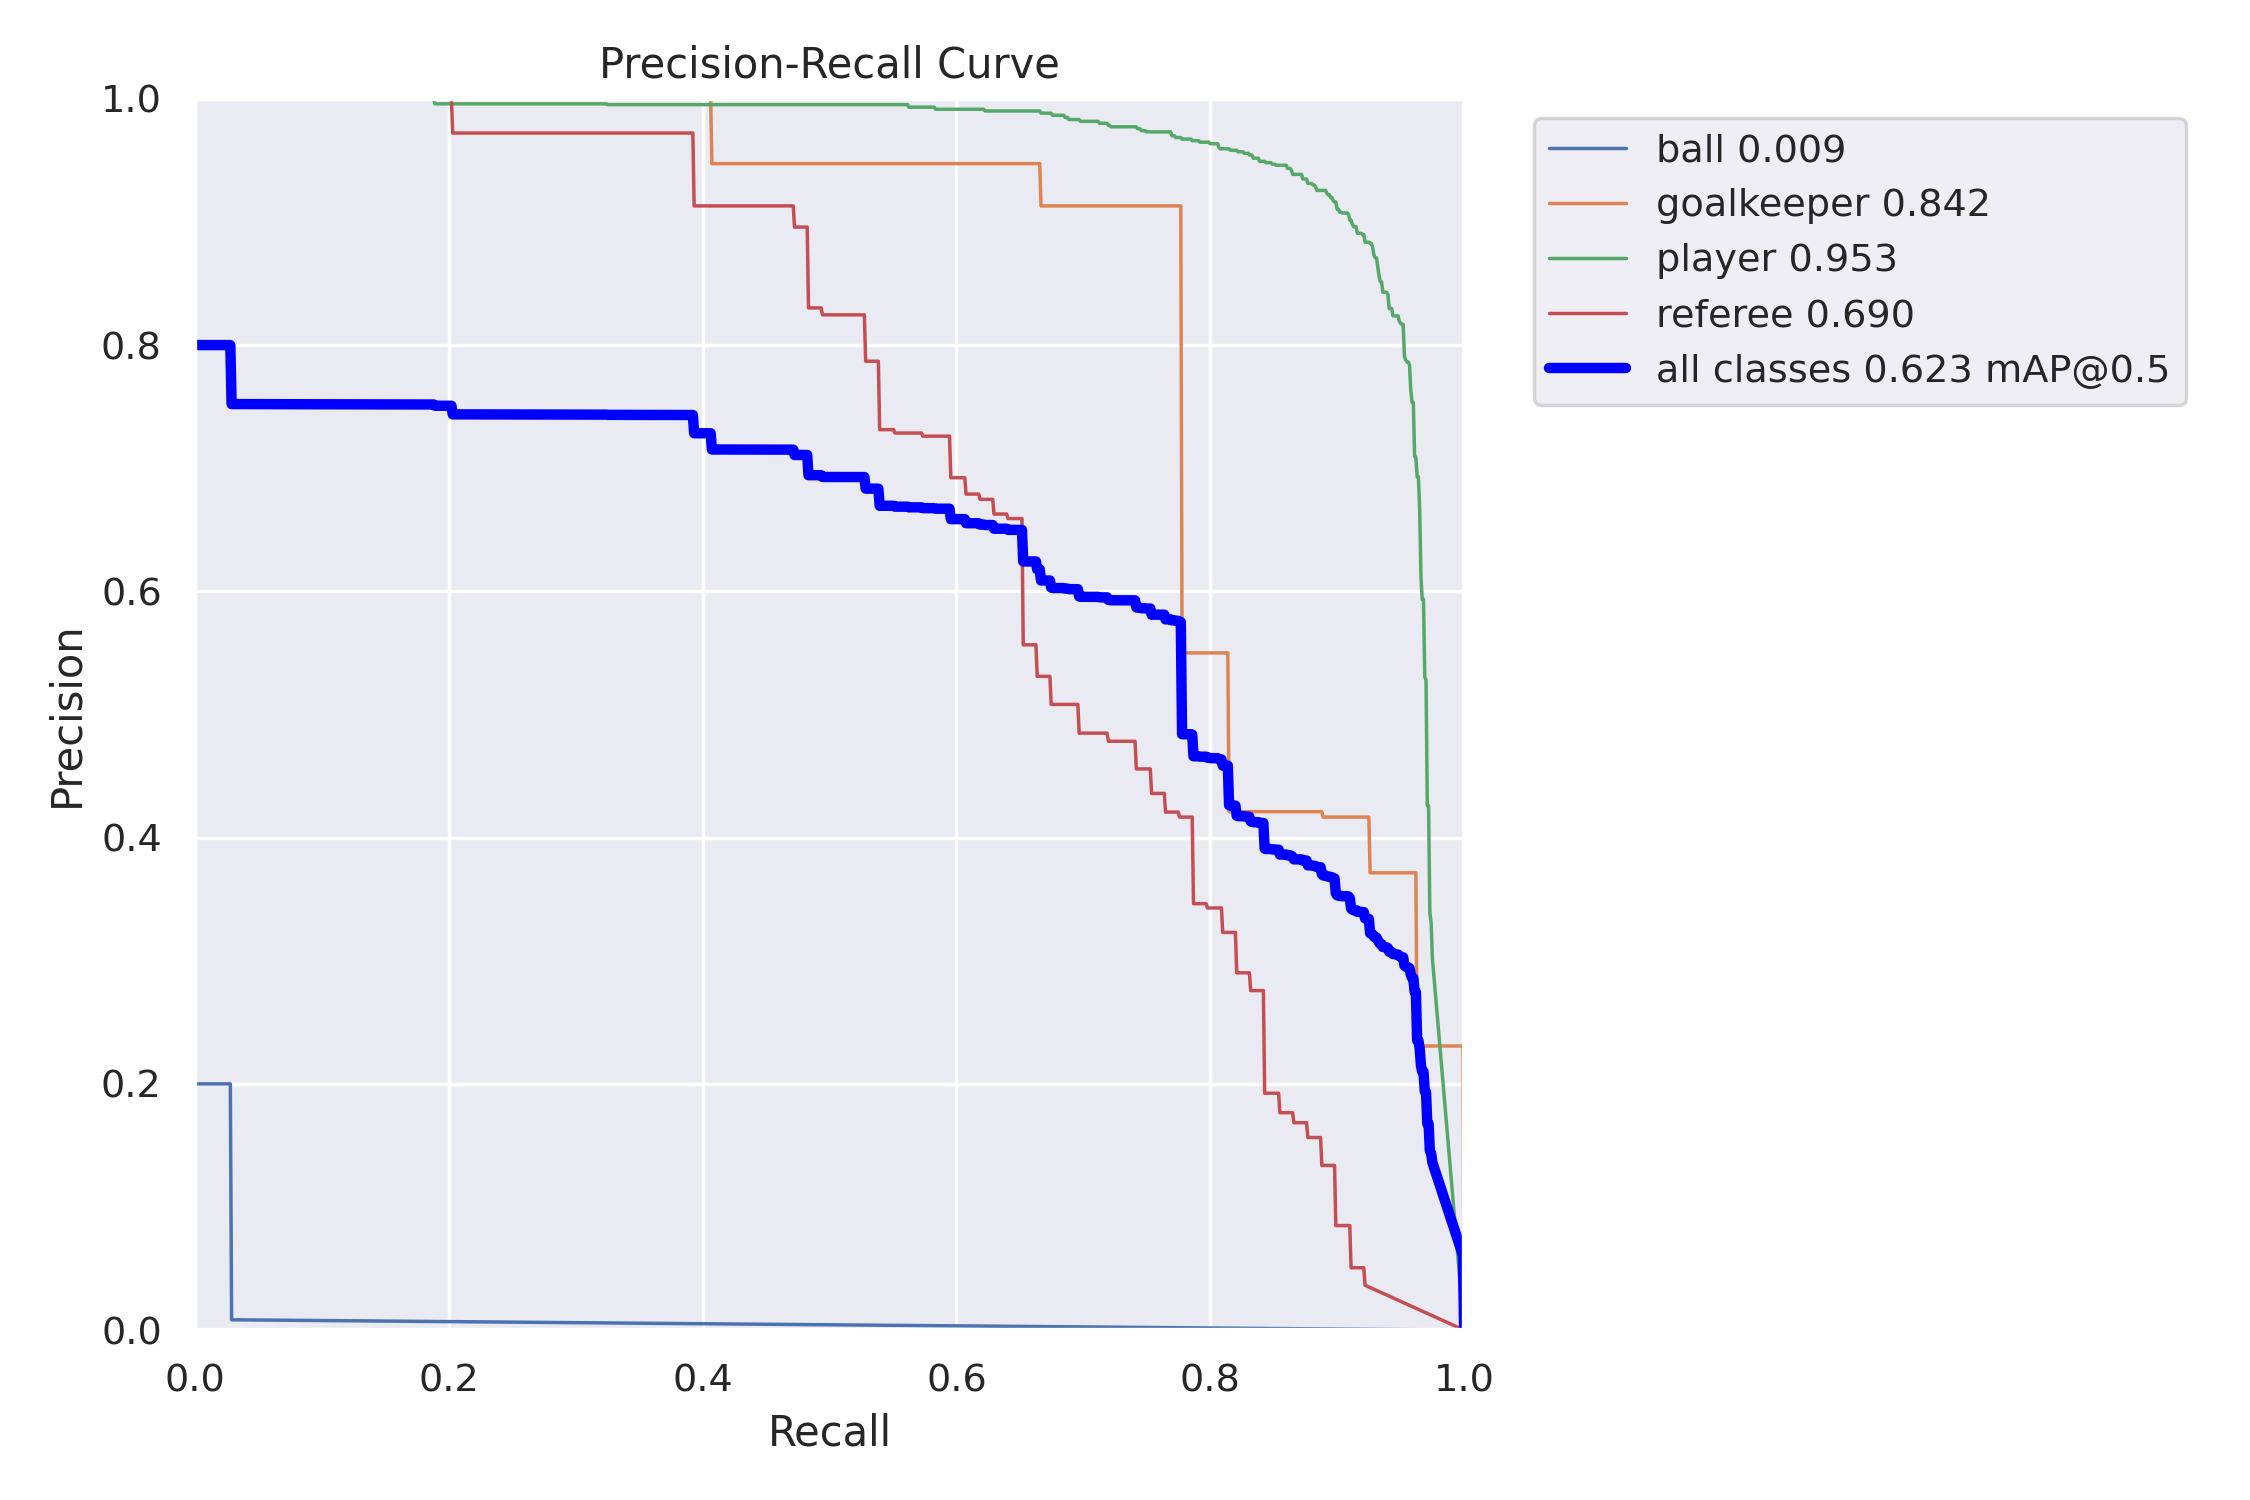

In [14]:
Image(filename=f'/content/datasets/runs/detect/train3/PR_curve.png', width=600)

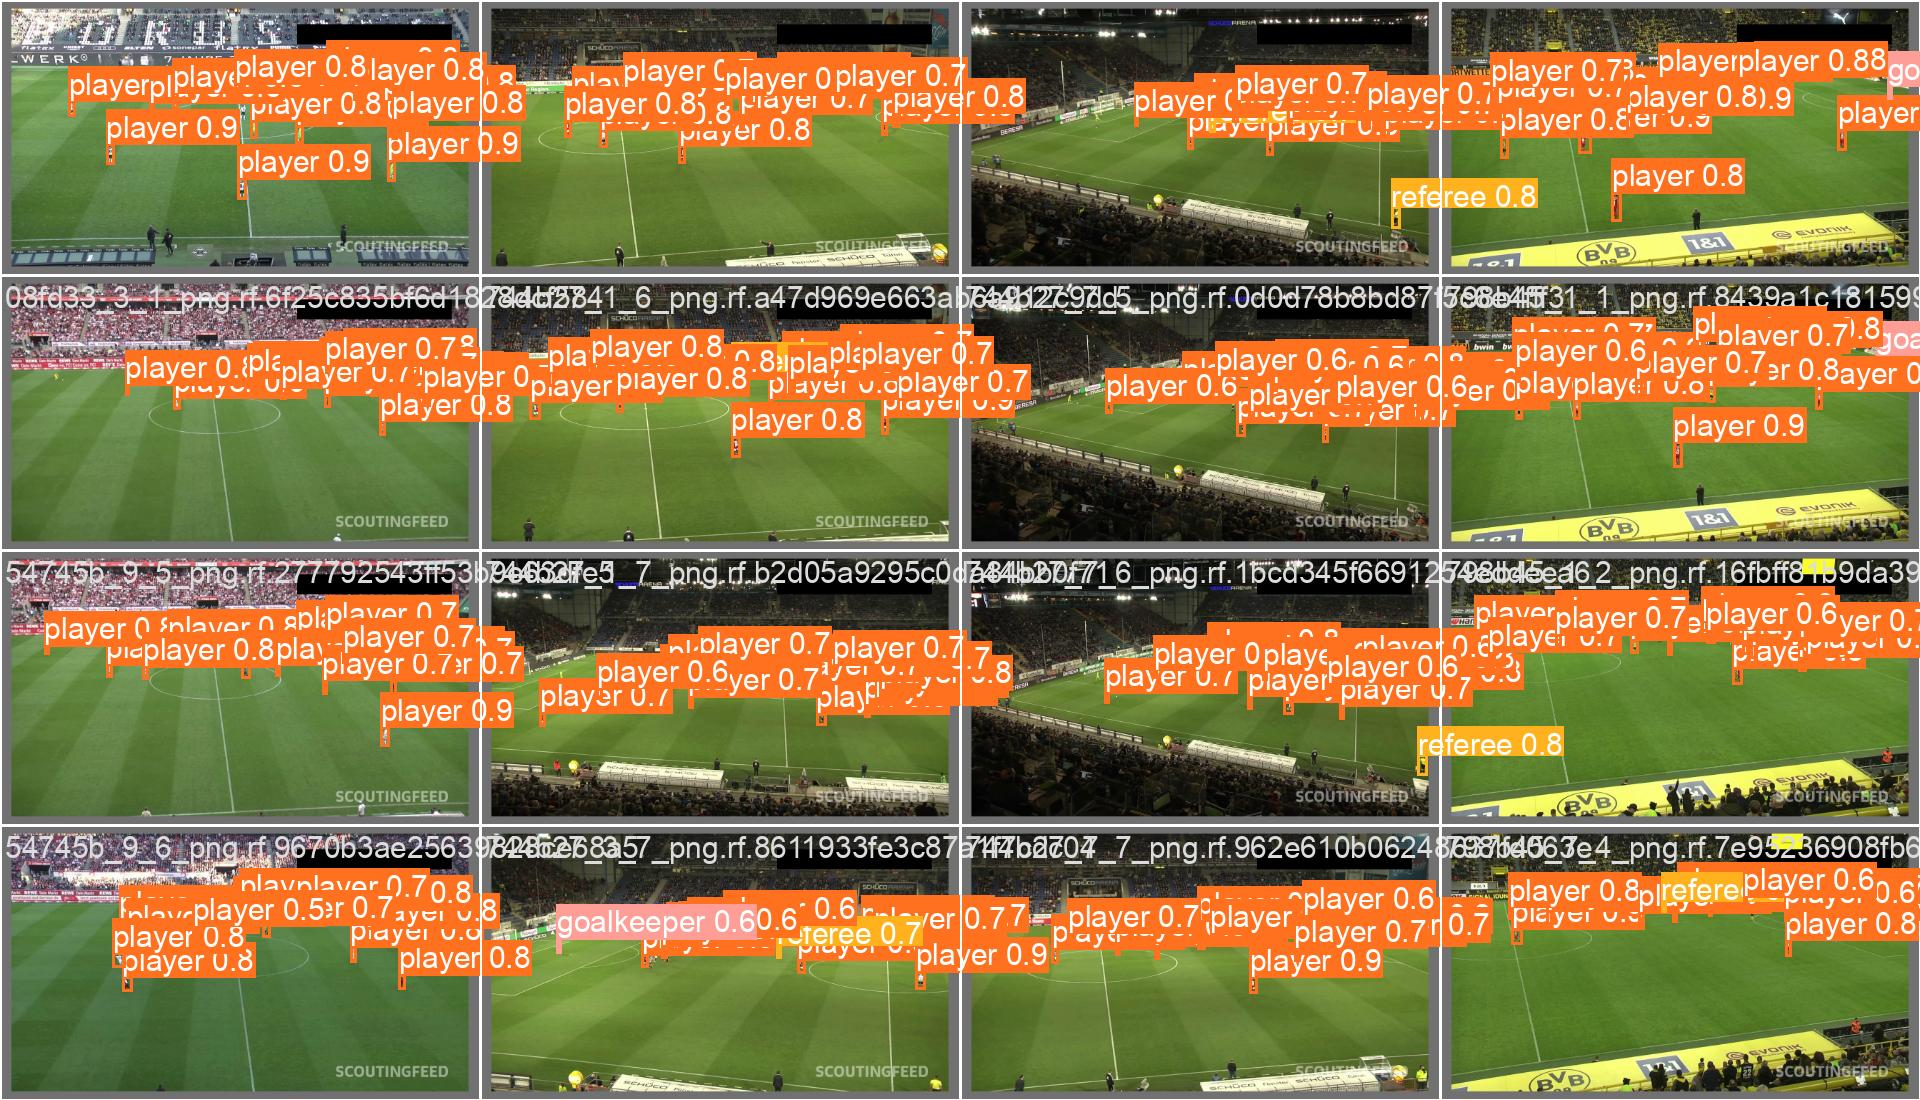

In [15]:
Image(filename=f'/content/datasets/runs/detect/train3/val_batch0_pred.jpg', width=600)

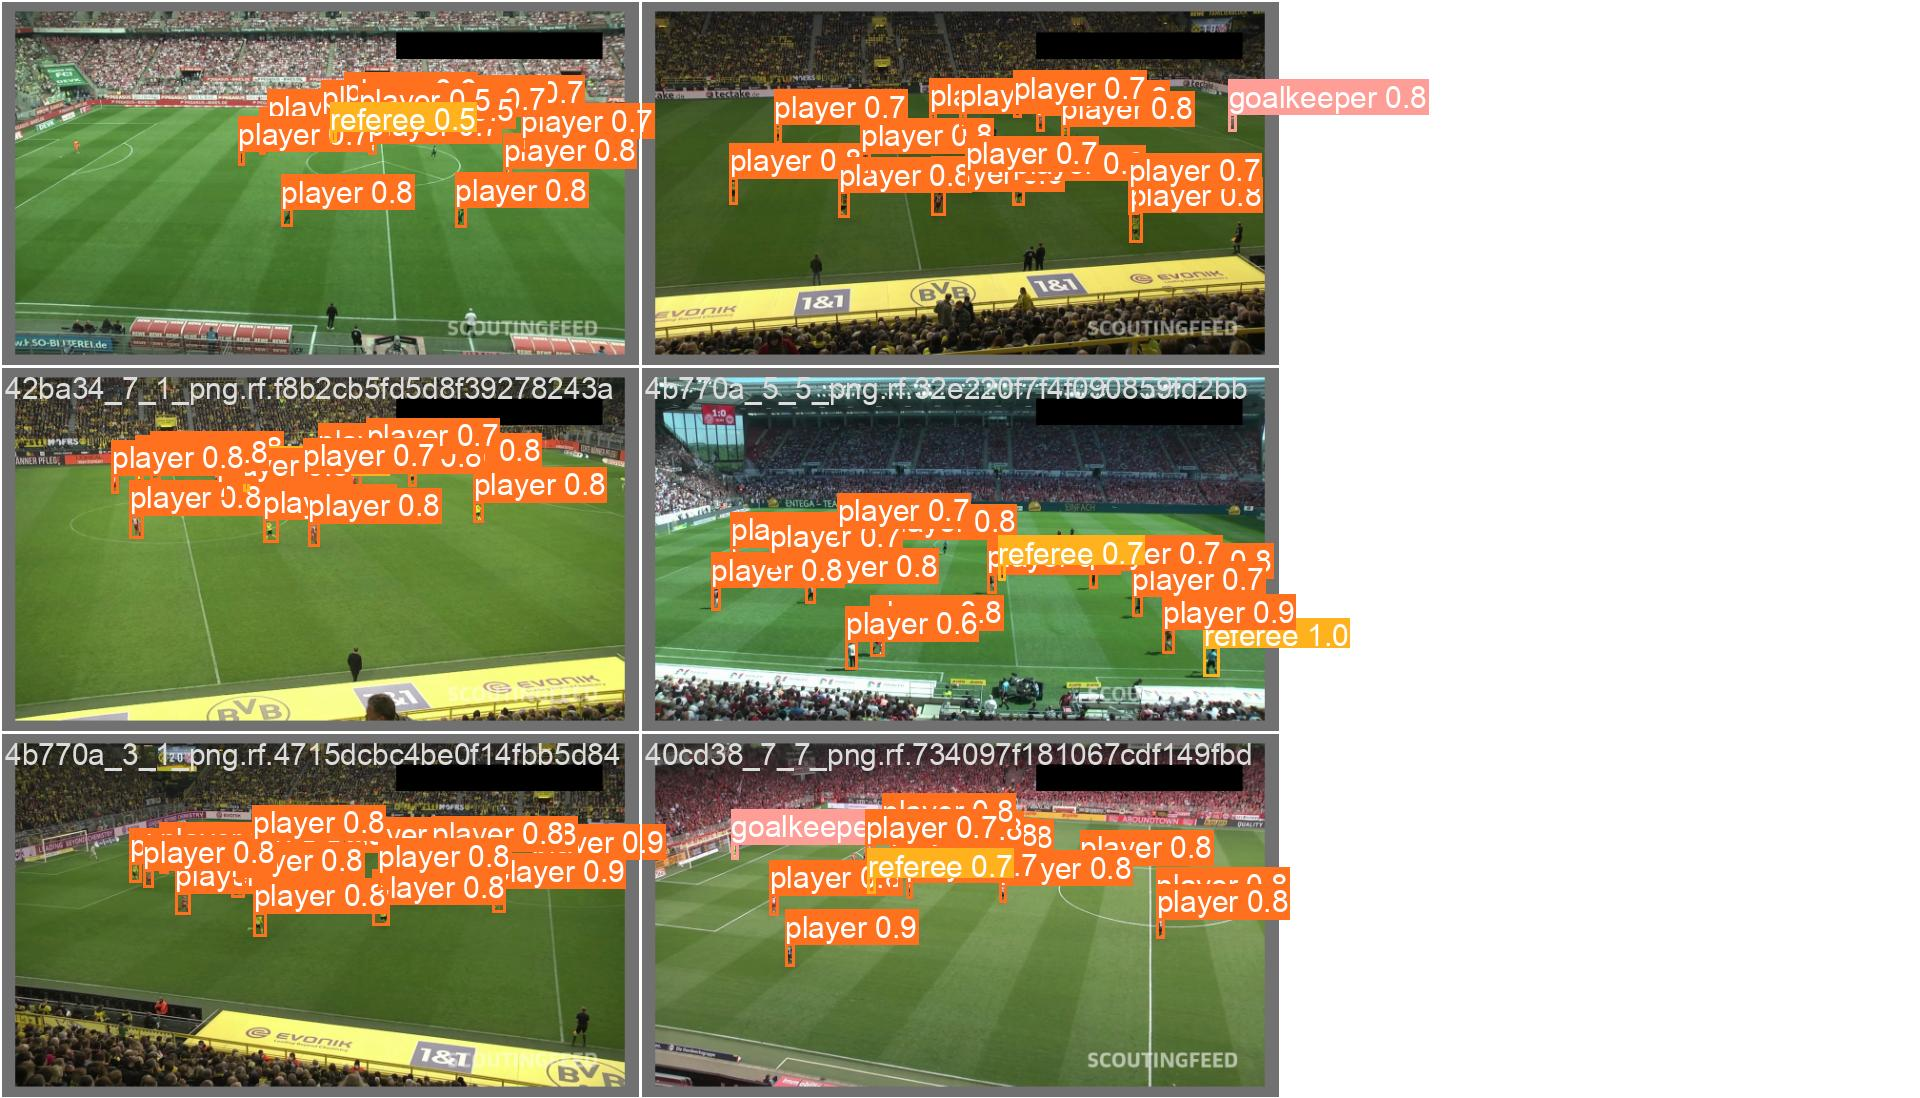

In [16]:
Image(filename=f'/content/datasets/runs/detect/train3/val_batch1_pred.jpg', width=600)

Validation of Model

In [5]:
model = YOLO('/content/datasets/runs/detect/train3/weights/best.pt')
metrics = model.val(plots = True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-detection-4/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.25s/it]
                   all         38        905      0.866      0.577       0.62      0.409
                  ball         38         35          1          0          0          0
            goalkeeper         38         27      0.911      0.759      0.842      0.581
                player         38        754       0.89      0.922      0.953      0.658
               referee         38         89      0.664      0.629      0.687      0.398
Speed: 2.3ms pre-process, 28.2ms inference, 0.0ms loss, 2.0ms post-process per image


Inference on the Model

In [6]:
model.predict(source='/content/datasets/football-players-detection-4/test/images' , conf=0.25 , save=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Results saved to runs/detect/predict2


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([21, 6])
 dtype: torch.float32
  + tensor([[1.31900e+03, 5.97000e+02, 1.35600e+03, 6.58000e+02, 8.69258e-01, 2.00000e+00],
         [1.08200e+03, 7.90000e+02, 1.11800e+03, 8.72000e+02, 8.45287e-01, 2.00000e+00],
         [1.81900e+03, 6.27000e+02, 1.85000e+03, 6.89000e+02, 8.40714e-01, 2.00000e+00],
         [1.68400e+03, 6.13000e+02, 1.72100e+03, 6.81000e+02, 8.21323e-01, 2.00000e+00],
         [5.45000e+02, 6.71000e+02, 5.96000e+02, 7.49000e+02, 7.96227e-01, 2.00000e+00],
         [9.06000e+02, 5.16000e+02, 9.27000e+02, 5.71000e+02, 7.92663e-01, 2.00000e+00],
         [1.74400e+03, 6.77000e+02, 1.78400e+03, 7.48000e+02, 7.76193e-01, 2.00000e+00],
         [8.14000e+02, 4.80000e+02, 8.38000e+02, 5.23000e+02, 7.65053e-01, 2.00000e+00],
         [1.15200e+03, 5.58000e+02, 1.17000e+03, 6.08000e+02, 7.58649e-01, 2.00000e+00],
         [7.96000e+02, 6.19000e+02, 8.20000e

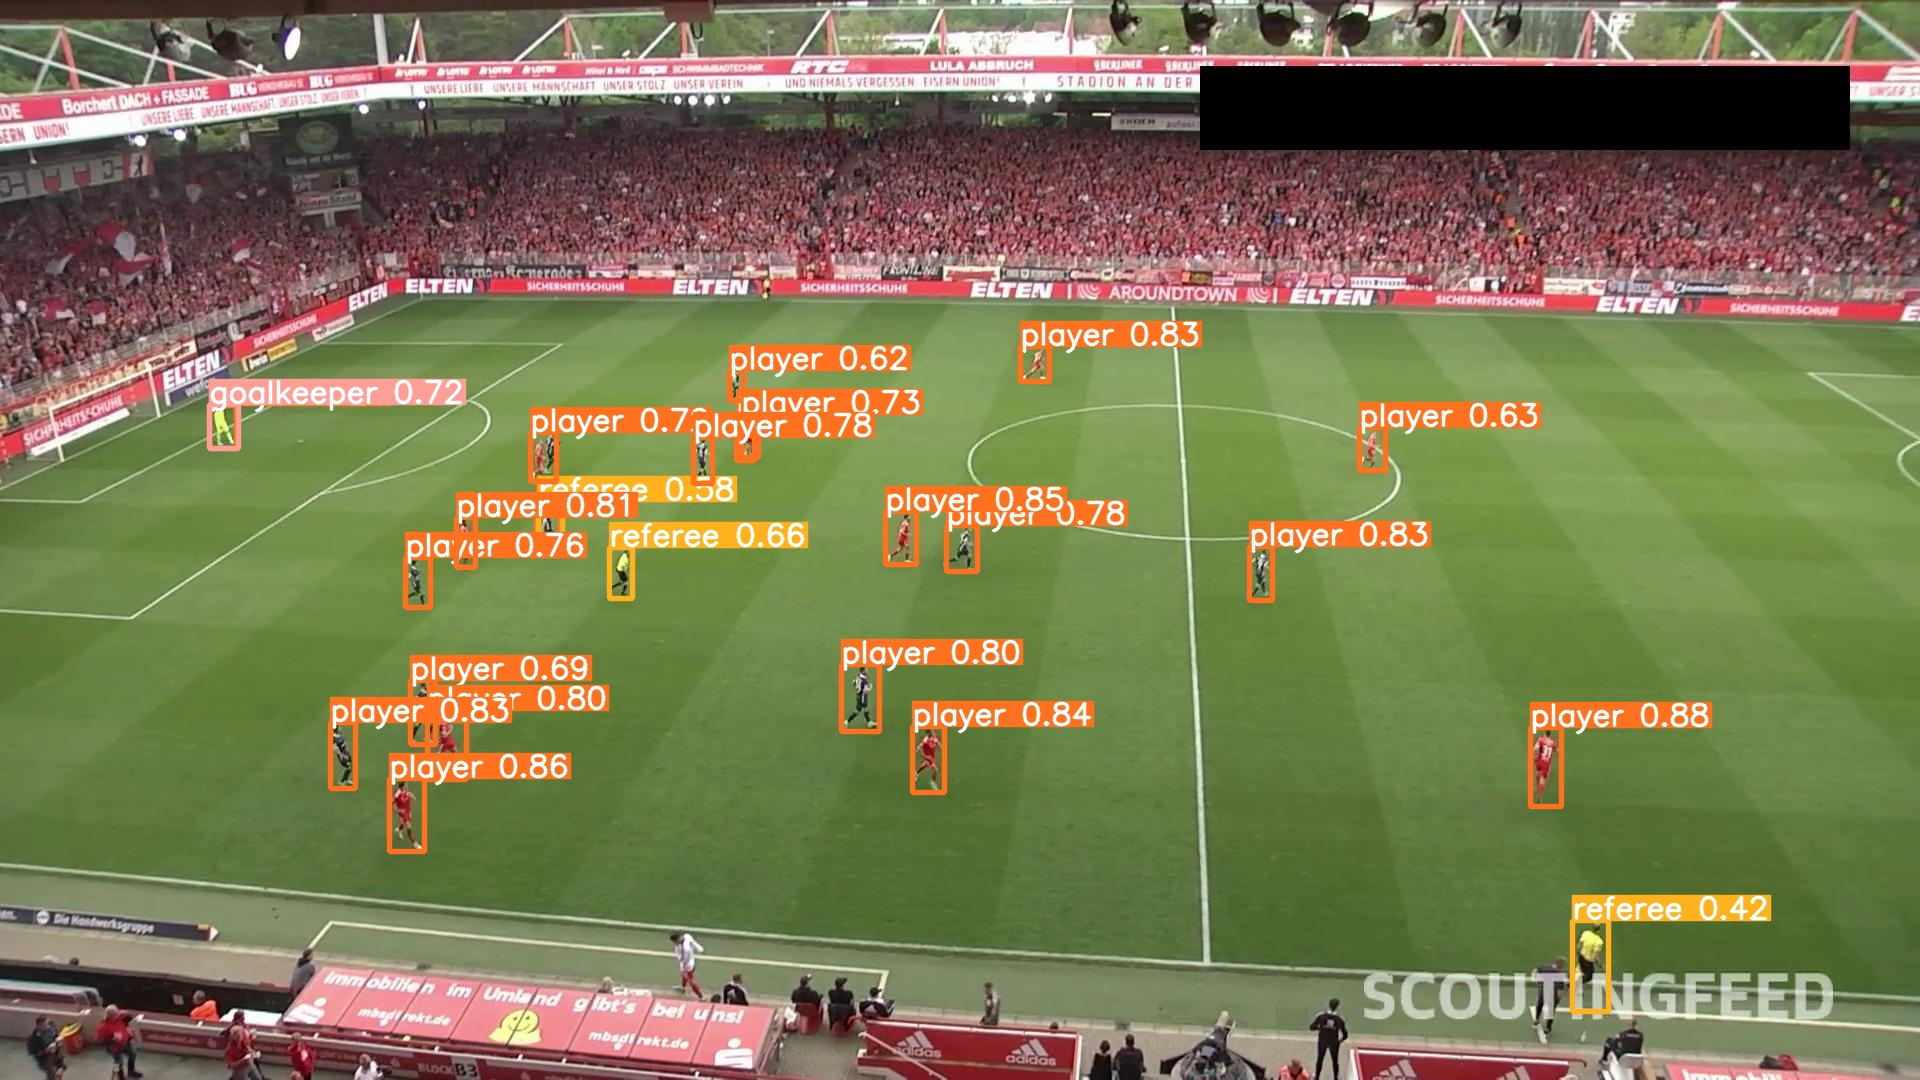

In [8]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")